In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
import copy

# Aim is to predict the marks of students of the test data

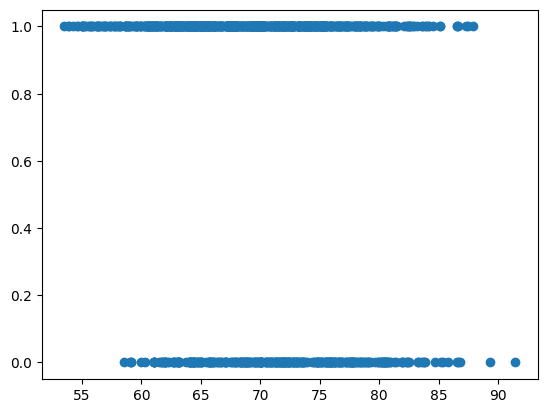

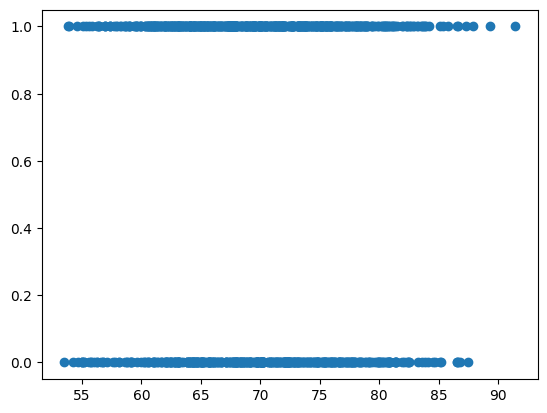

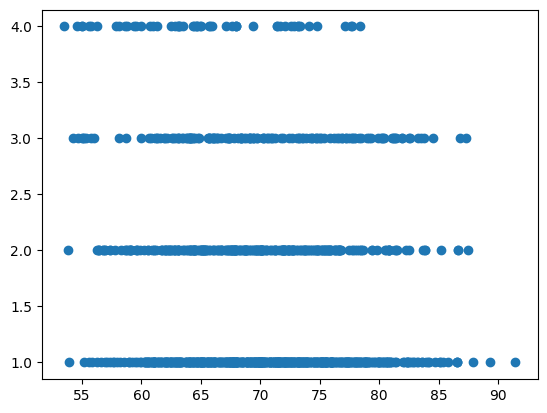

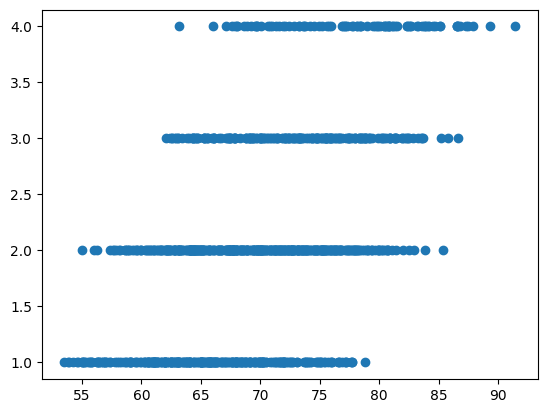

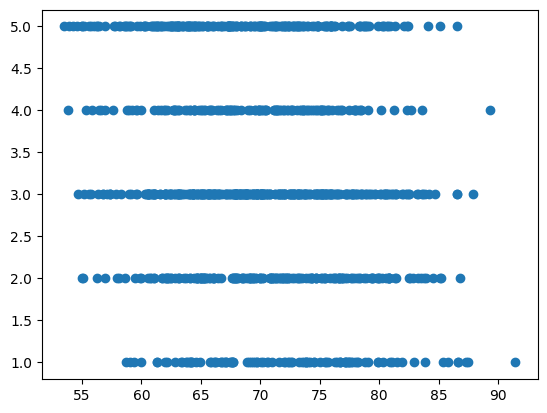

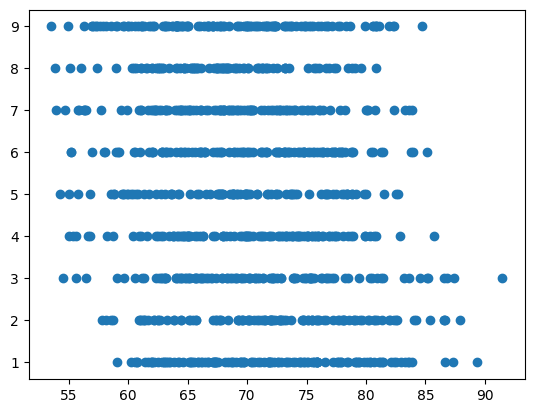

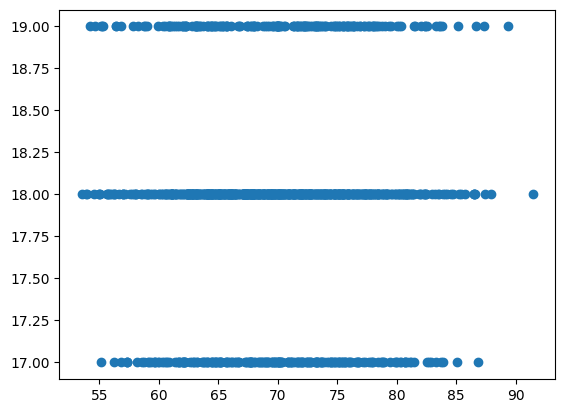

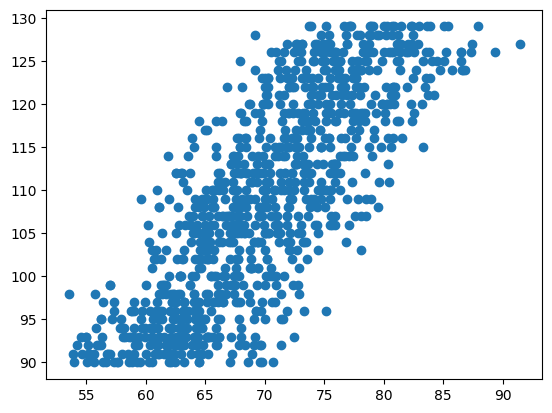

In [71]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')

label = preprocessing.LabelEncoder() 

data['sex']= label.fit_transform(data['sex'])
data['internet'] = label.fit_transform(data['internet'])


x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)


for i in range(8):
    plt.scatter(y_train,x_train[:,i])
    plt.show()




# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train


# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM



In [72]:
def z_score(x_train):

  x_std = np.std(x_train, axis=0)

  x_mean = np.mean(x_train, axis=0)

  x_train = (x_train - x_mean)/x_std

  return x_train,x_std,x_mean

print(z_score(x_train))

(array([[-1.46446375e+00,  8.56213906e-01,  2.86766521e-01, ...,
         3.75906959e-01,  3.31807385e-02,  7.71401505e-01],
       [ 6.82843803e-01,  8.56213906e-01,  2.86766521e-01, ...,
         7.51438386e-01,  1.61321590e+00, -1.74154162e-01],
       [ 6.82843803e-01,  8.56213906e-01,  1.39826467e+00, ...,
         3.75531427e-04,  3.31807385e-02, -8.81945558e-02],
       ...,
       [ 6.82843803e-01,  8.56213906e-01,  2.86766521e-01, ...,
         3.75531427e-04, -1.54685443e+00,  1.20119954e+00],
       [ 6.82843803e-01, -1.16793244e+00, -8.24731623e-01, ...,
         1.12696981e+00, -1.54685443e+00, -4.32032980e-01],
       [ 6.82843803e-01,  8.56213906e-01, -8.24731623e-01, ...,
         3.75906959e-01,  3.31807385e-02,  1.63099757e+00]]), array([ 0.46569947,  0.49403542,  0.89968661,  0.92281959,  1.26827402,
        2.66289298,  0.63289731, 11.63337114]), array([  0.682,   0.577,   1.742,   2.102,   3.191,   4.999,  17.979,
       109.026]))


In [73]:
def cost(x_train,y_train,w,b):
    
    m = x_train.shape[0]
    loss = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(x_train[i], w) + b           
        loss = loss + (f_wb_i - y_train[i])**2       
    loss = loss / (2 * m)                          
    return loss


In [78]:
def compute_gradient(x_train,y_train,w,b):
   m,n = x_train.shape
   dj_dw = np.zeros((n,))
   dj_db = 0.

   for i in range(m):                             
    err = (np.dot(x_train[i], w) + b) - y_train[i]   
    for j in range(n):                         
        dj_dw[j] = dj_dw[j] + err * x_train[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

def gradient_descent(x_train,y_train,w_in,b_in):

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    alpha = 0.05
    num_iters = 100000
    for i in range(num_iters):

        dj_db,dj_dw = compute_gradient(x_train, y_train, w, b)

        w = w - alpha * dj_dw  
        b = b - alpha * dj_db 

        if i<100000:
            J_history.append( cost(x_train, y_train, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history 


In [81]:

x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w1 = np.random.randn(x_train.shape[1],1)
b1 = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w1,b1)

data2 = pd.read_excel('Test data.xlsx')


label = preprocessing.LabelEncoder() 

data2['sex']= label.fit_transform(data['sex'])
data2['internet'] = label.fit_transform(data['internet'])

x_predict = data2.iloc[:,:8].to_numpy()

x_predict = (x_predict - x_mean)/x_std
ans = data2.iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

C:\Users\Asmit\AppData\Local\Temp\ipykernel_16904\751826132.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * x_train[i, j]


TypeError: unsupported format string passed to numpy.ndarray.__format__